In [38]:
from math import sqrt, pow
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time as tm
import pandas as pd

In [39]:
# styles
sns.set_style("darkgrid")

In [40]:
# create arrays
array1 = np.random.rand(10000)
array1_checkpoints = [500, 1000, 2000, 4000, 8000, 10000]
array2 = np.random.rand(1000000)
array2_checkpoints = [10000, 20000, 40000, 80000, 160000, 320000, 640000, 1000000]

In [41]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

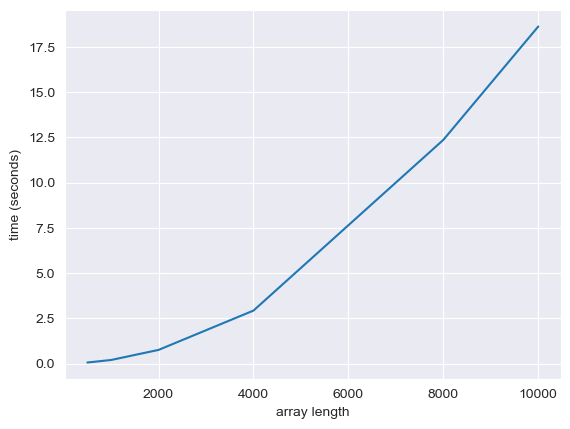

   length  time (seconds)
0     500        0.058800
1    1000        0.198339
2    2000        0.755478
3    4000        2.929342
4    8000       12.363710
5   10000       18.628734


In [42]:
exec_time_bubble = []
for value in array1_checkpoints:
    start_time = tm.time()
    array_bubble = array1[:value].copy()
    bubble_sort(array_bubble)
    exec_time_bubble.append(tm.time() - start_time)

plt.plot(array1_checkpoints, exec_time_bubble)
plt.xlabel("array length")
plt.ylabel("time (seconds)")
plt.show()

table = pd.DataFrame(data=array1_checkpoints, columns=['length'])
table['time (seconds)'] = exec_time_bubble
print(table)

In [43]:
# Quick sort in Python
def partition(array, low, high):
    pivot = array[high]
    i = low - 1
    for j in range(low, high):
        if array[j] <= pivot:
            i = i + 1
            (array[i], array[j]) = (array[j], array[i])

    (array[i + 1], array[high]) = (array[high], array[i + 1])

    return i + 1

def quickSort(array, low, high):
    if low < high:
        pi = partition(array, low, high)
        quickSort(array, low, pi - 1)
        quickSort(array, pi + 1, high)

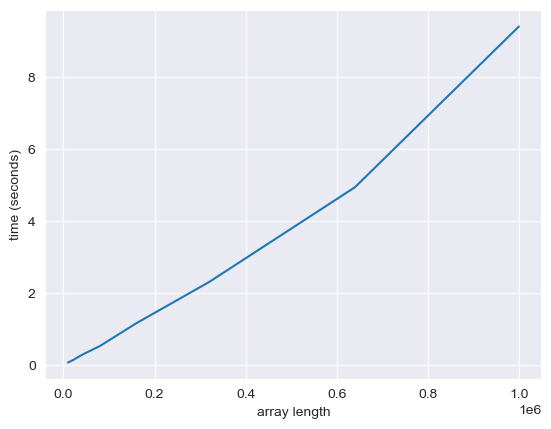

    length  time (seconds)
0    10000        0.071759
1    20000        0.131564
2    40000        0.280064
3    80000        0.529234
4   160000        1.161114
5   320000        2.306285
6   640000        4.934512
7  1000000        9.394577


In [44]:
exec_time_quick = []
for value in array2_checkpoints:
    start_time = tm.time()
    array_quick = array2[:value].copy()
    quickSort(array_quick, 0, value-1)
    exec_time_quick.append(tm.time() - start_time)

plt.plot(array2_checkpoints, exec_time_quick)
plt.xlabel("array length")
plt.ylabel("time (seconds)")
plt.show()

table = pd.DataFrame(data=array2_checkpoints, columns=['length'])
table['time (seconds)'] = exec_time_quick
print(table)

In [45]:
# mergeSort
def mergeSort(arr):
    if len(arr) > 1:
        mid = len(arr)//2
        L = arr[:mid]
        R = arr[mid:]
        mergeSort(L)
        mergeSort(R)
        i = j = k = 0
        
        while i < len(L) and j < len(R):
            if L[i] <= R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
        
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

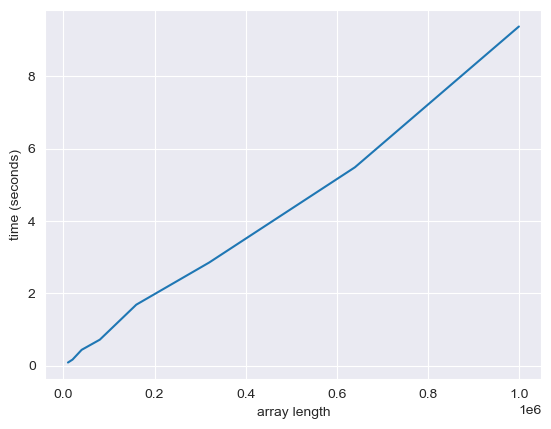

    length  time (seconds)
0    10000        0.082727
1    20000        0.163498
2    40000        0.433501
3    80000        0.715618
4   160000        1.683371
5   320000        2.849464
6   640000        5.484710
7  1000000        9.379632


In [46]:
exec_time_merge = []
for value in array2_checkpoints:
    start_time = tm.time()
    array_merge = array2[:value].copy()
    quickSort(array_merge, 0, value-1)
    exec_time_merge.append(tm.time() - start_time)

plt.plot(array2_checkpoints, exec_time_merge)
plt.xlabel("array length")
plt.ylabel("time (seconds)")
plt.show()

table = pd.DataFrame(data=array2_checkpoints, columns=['length'])
table['time (seconds)'] = exec_time_merge
print(table)

In [47]:
# heap sort
def heapify(arr, N, i):
    largest = i
    l = 2 * i + 1     # left = 2*i + 1
    r = 2 * i + 2     # right = 2*i + 2

    if l < N and arr[largest] < arr[l]:
        largest = l

    if r < N and arr[largest] < arr[r]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # swap

        heapify(arr, N, largest)

def heapSort(arr):
    N = len(arr)

    for i in range(N//2 - 1, -1, -1):
        heapify(arr, N, i)

    for i in range(N-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # swap
        heapify(arr, i, 0)

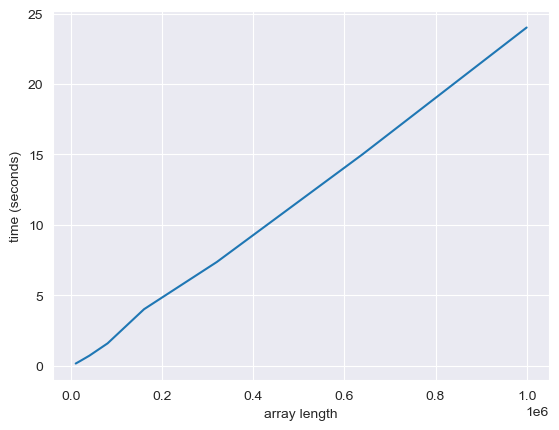

    length  time (seconds)
0    10000        0.149503
1    20000        0.330897
2    40000        0.707640
3    80000        1.582700
4   160000        4.006605
5   320000        7.364379
6   640000       15.013909
7  1000000       24.010764


In [48]:
exec_time_heap = []
for value in array2_checkpoints:
    start_time = tm.time()
    array_heap = array2[:value].copy()
    heapSort(array_heap)
    exec_time_heap.append(tm.time() - start_time)

plt.plot(array2_checkpoints, exec_time_heap)
plt.xlabel("array length")
plt.ylabel("time (seconds)")
plt.show()

table = pd.DataFrame(data=array2_checkpoints, columns=['length'])
table['time (seconds)'] = exec_time_heap
print(table)


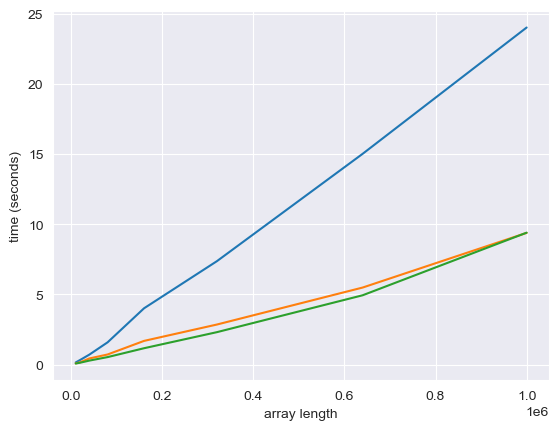

In [49]:
plt.plot(array2_checkpoints, exec_time_heap)
plt.plot(array2_checkpoints, exec_time_merge)
plt.plot(array2_checkpoints, exec_time_quick)
plt.xlabel("array length")
plt.ylabel("time (seconds)")
plt.show()